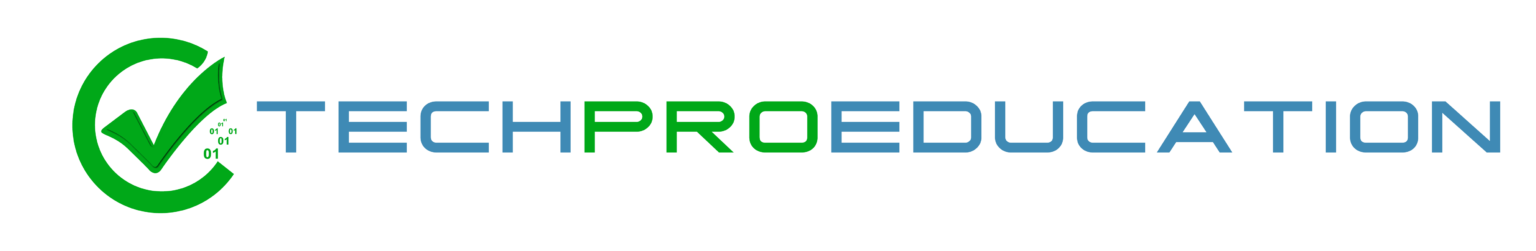

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (9,9)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
adult = pd.read_csv("adult.csv")
df = adult.copy()

In [3]:
df.sample(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
17901,28,Private,217200,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,50,United-States,<=50K
16938,37,Private,37109,HS-grad,9,Married-civ-spouse,Other-service,Wife,Asian-Pac-Islander,Female,0,0,60,Philippines,<=50K
7389,21,Private,342575,Some-college,10,Never-married,Sales,Own-child,Black,Female,0,0,30,United-States,<=50K


age: Kişinin yaşı. Bu sayısal bir değerdir.

workclass: Kişinin çalıştığı sektör veya iş sınıfı. Bu kategorik bir değişkendir.

fnlwgt: Kişinin temsil ettiği popülasyon ağırlığı (final weight). Bu sayısal bir değerdir ve genellikle örneklemin genel nüfusu temsil etme derecesini gösterir.

education: Kişinin eğitim seviyesi. Bu kategorik bir değişkendir.

education.num: Kişinin eğitim seviyesini temsil eden bir sayı. Bu sayısal bir değerdir.

marital.status: Kişinin medeni durumu. Bu kategorik bir değişkendir.

occupation: Kişinin mesleği. Bu kategorik bir değişkendir.

relationship: Kişinin aile ilişkisi durumu. Bu kategorik bir değişkendir.

race: Kişinin ırkı. Bu kategorik bir değişkendir.

sex: Kişinin cinsiyeti. Bu kategorik bir değişkendir.

capital.gain: Kişinin sermaye kazancı. Bu sayısal bir değerdir.

capital.loss: Kişinin sermaye kaybı. Bu sayısal bir değerdir.

hours.per.week: Haftada çalışılan saat sayısı. Bu sayısal bir değerdir.

native.country: Kişinin doğum ülkesi. Bu kategorik bir değişkendir.

income: Hedef değişken. Kişinin gelir seviyesini belirtir.

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.shape

(32561, 15)

In [7]:
df.sample(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
24594,28,Private,194472,Some-college,10,Married-civ-spouse,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
8475,41,Private,187322,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,48,United-States,<=50K
7466,38,Private,296125,HS-grad,9,Separated,Priv-house-serv,Unmarried,Black,Female,0,0,30,United-States,<=50K


In [8]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
df_numeric = df.select_dtypes(include="number")
df_numeric

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40
...,...,...,...,...,...,...
32556,22,310152,10,0,0,40
32557,27,257302,12,0,0,38
32558,40,154374,9,0,0,40
32559,58,151910,9,0,0,40


In [11]:
df["education"].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [12]:
df["education.num"].unique()

array([ 9, 10,  4,  6, 16, 15, 13, 14,  7, 12, 11,  2,  3,  8,  5,  1],
      dtype=int64)

İkisi de eğitimle ilgili bilgileri içeriyor. Bu durumda, sadece bir tanesini kullanabilirsiniz. 

Örneğin, "education.num" sütunu sayısal bir temsili içeriyor, bu nedenle sayısal temsilin daha kullanışlı olabilir.

In [13]:
df.drop('education', axis=1, inplace=True)

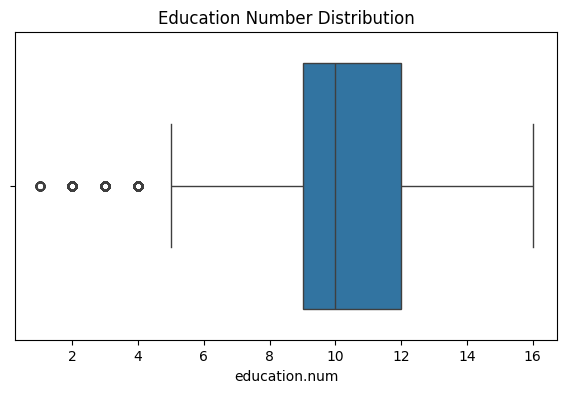

In [14]:
sns.boxplot(x='education.num', data=df)
plt.title('Education Number Distribution')
plt.show()

In [15]:
df["relationship"].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [16]:
df["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

Bu iki sütunda aynı şeyi ifade ediyor.

Bu yüzden an mantıklı olanı relationship sütununu kaldırdım 

In [17]:
df.drop('relationship', axis=1, inplace=True)

In [18]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

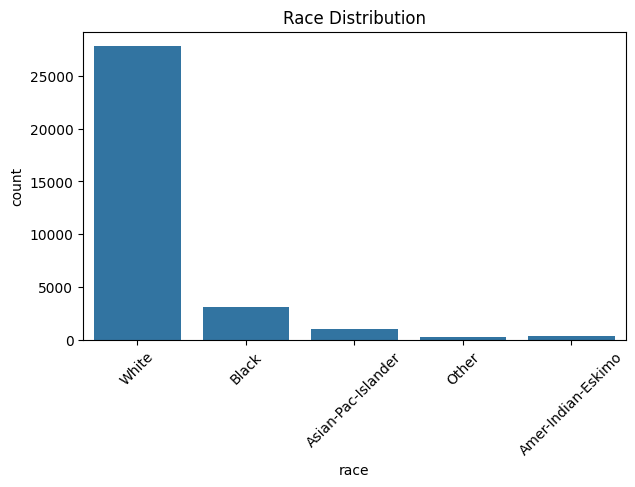

In [19]:
sns.countplot(x='race', data=df)
plt.title('Race Distribution')
plt.xticks(rotation=45)
plt.show()

In [20]:
df["sex"].unique()

array(['Female', 'Male'], dtype=object)

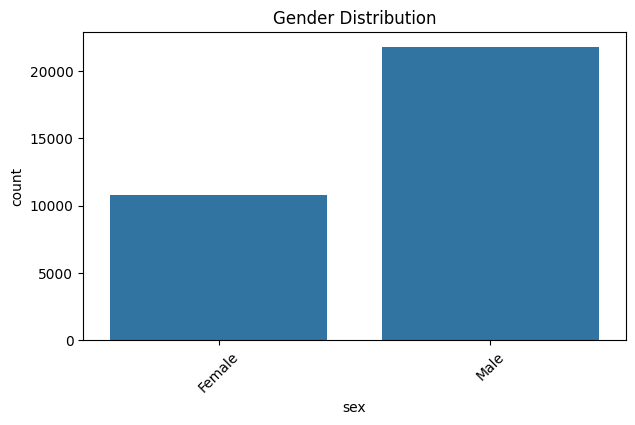

In [21]:
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

In [22]:
df["native.country"].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [23]:
df["native.country"].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [24]:
df['native.country'].replace('?', method='ffill', inplace=True)
df['native.country'].replace('?', method='bfill', inplace=True)

In [25]:
df["native.country"].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [26]:
df["fnlwgt"].unique()

array([ 77053, 132870, 186061, ...,  34066,  84661, 257302], dtype=int64)

In [27]:
df["fnlwgt"].value_counts()

fnlwgt
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: count, Length: 21648, dtype: int64

In [28]:
df["occupation"].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [29]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [30]:
df['occupation'].replace('?', method='ffill', inplace=True)
df['occupation'].replace('?', method='bfill', inplace=True)

In [31]:
df["occupation"].value_counts()

occupation
Prof-specialty       4383
Craft-repair         4369
Exec-managerial      4282
Adm-clerical         3985
Sales                3863
Other-service        3483
Machine-op-inspct    2137
Transport-moving     1701
Handlers-cleaners    1476
Farming-fishing      1050
Tech-support          980
Protective-serv       679
Priv-house-serv       163
Armed-Forces           10
Name: count, dtype: int64

In [32]:
df["age"].unique()

array([90, 82, 66, 54, 41, 34, 38, 74, 68, 45, 52, 32, 51, 46, 57, 22, 37,
       29, 61, 21, 33, 49, 23, 59, 60, 63, 53, 44, 43, 71, 48, 73, 67, 40,
       50, 42, 39, 55, 47, 31, 58, 62, 36, 72, 78, 83, 26, 70, 27, 35, 81,
       65, 25, 28, 56, 69, 20, 30, 24, 64, 75, 19, 77, 80, 18, 17, 76, 79,
       88, 84, 85, 86, 87], dtype=int64)

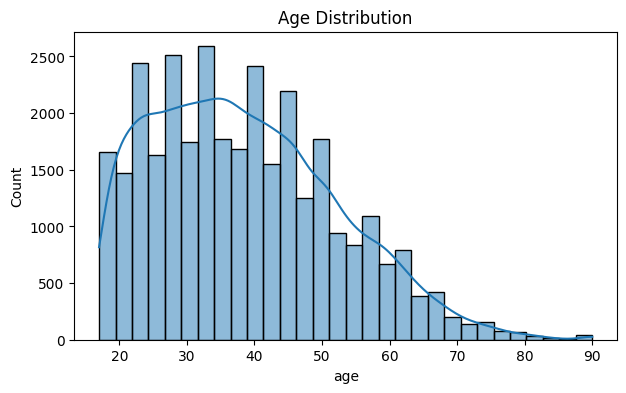

In [33]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

In [34]:
df["workclass"].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [35]:
df["workclass"].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [36]:
df['workclass'].replace('?', method='ffill', inplace=True)
df['workclass'].replace('?', method='bfill', inplace=True)

In [37]:
df["workclass"].value_counts()

workclass
Private             24087
Self-emp-not-inc     2701
Local-gov            2203
State-gov            1374
Self-emp-inc         1173
Federal-gov          1001
Without-pay            15
Never-worked            7
Name: count, dtype: int64

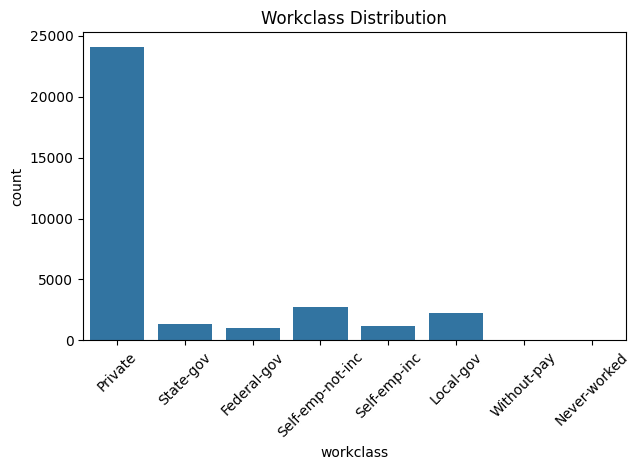

In [38]:
sns.countplot(x='workclass', data=df)
plt.title('Workclass Distribution')
plt.xticks(rotation=45)
plt.show()

In [39]:
df["capital.gain"].unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114], dtype=int64)

In [40]:
df["capital.loss"].unique()

array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2489,
       2472, 2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267,
       2258, 2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2163, 2149,
       2129, 2080, 2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944,
       1902, 1887, 1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740,
       1735, 1726, 1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617,
       1602, 1594, 1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408,
       1380, 1340, 1258, 1138, 1092,  974,  880,  810,  653,  625,  419,
        323,  213,  155,    0], dtype=int64)

In [41]:
df["hours.per.week"].unique()

array([40, 18, 45, 20, 60, 35, 55, 76, 50, 42, 25, 32, 90, 48, 15, 70, 52,
       72, 39,  6, 65, 12, 80, 67, 99, 30, 75, 26, 36, 10, 84, 38, 62, 44,
        8, 28, 59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 63,  1, 47, 68,
       54,  2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 53, 96, 66, 21,
        7, 13, 27, 11, 14, 77, 31, 78, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95], dtype=int64)

In [42]:
df["native.country"].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [43]:
df["native.country"].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [44]:
df["native.country"].value_counts()

native.country
United-States                 29703
Mexico                          653
Philippines                     200
Germany                         140
Canada                          123
Puerto-Rico                     118
El-Salvador                     109
India                           101
Cuba                             96
England                          93
Jamaica                          83
South                            80
China                            75
Vietnam                          73
Italy                            73
Dominican-Republic               72
Guatemala                        66
Japan                            62
Columbia                         61
Poland                           60
Taiwan                           52
Haiti                            45
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           31
France       

In [45]:
df.sample(1)

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32275,21,Private,180190,11,Married-civ-spouse,Farming-fishing,White,Male,0,0,46,United-States,<=50K


In [46]:
common_countries = ['United-States', 'Mexico', 'Philippines', 'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England']
df['native.country'] = np.where(df['native.country'].isin(common_countries), df['native.country'], 'Other')

In [47]:
categor = df.select_dtypes("object").columns 
categor

Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
       'native.country', 'income'],
      dtype='object')

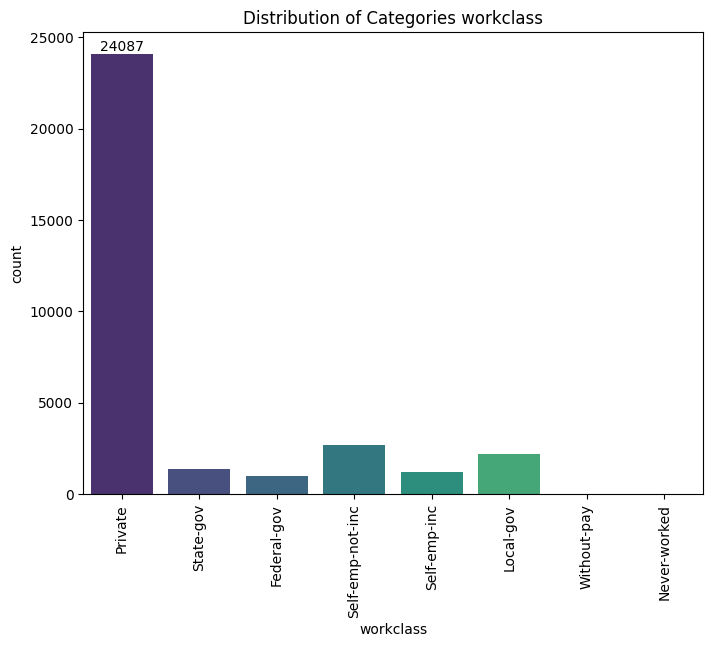

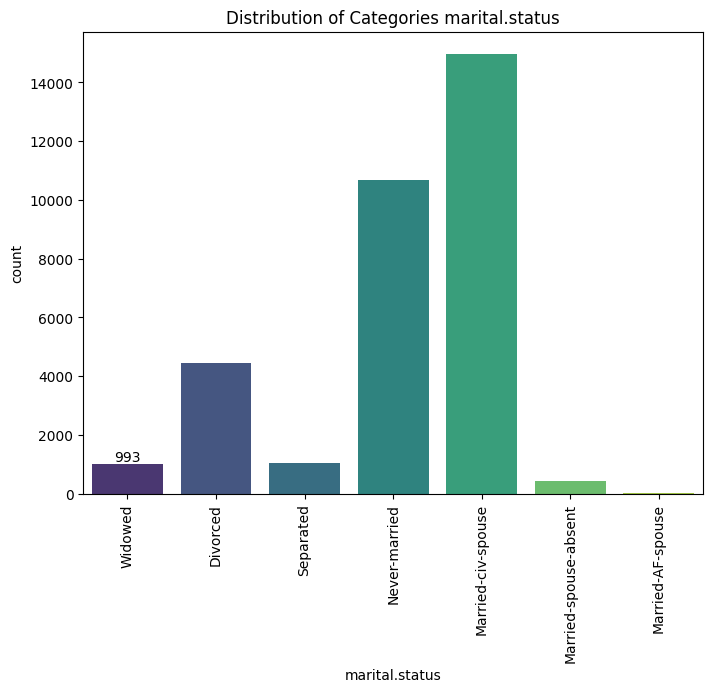

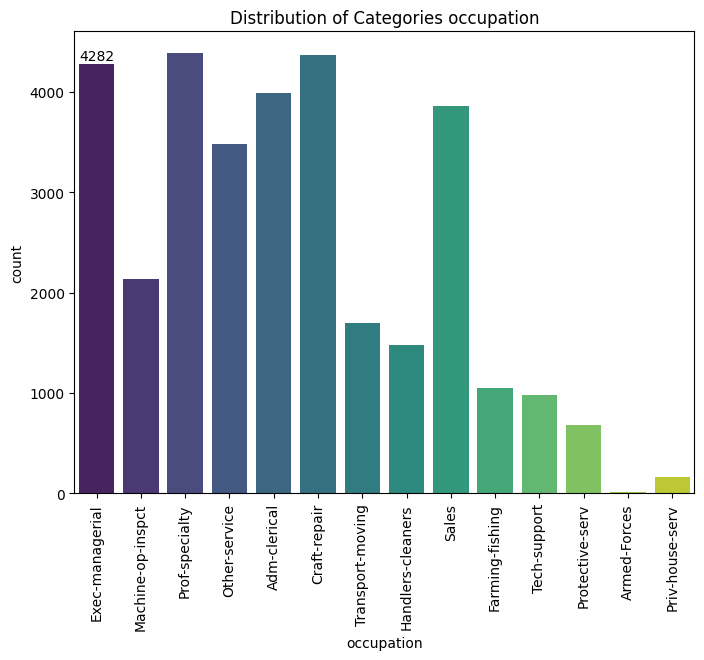

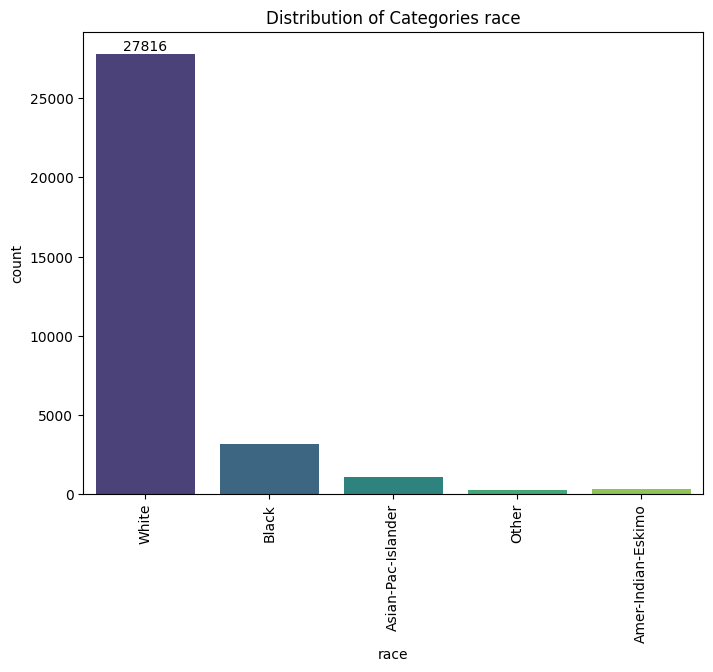

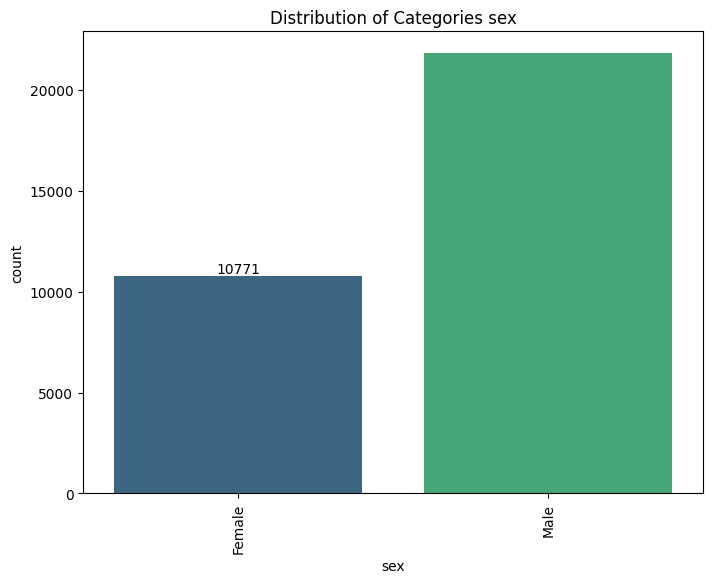

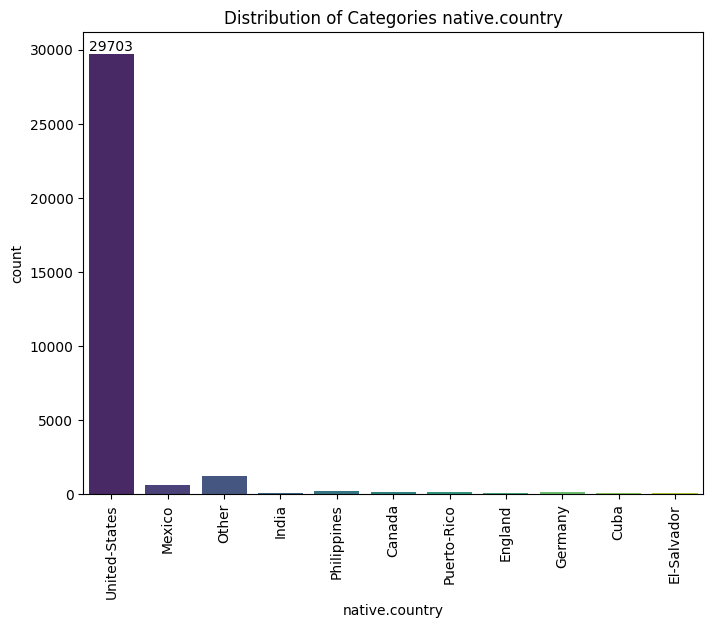

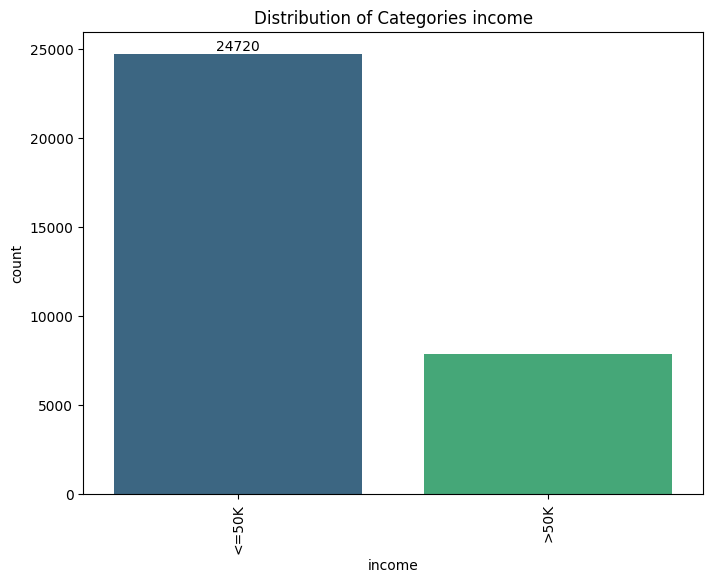

In [48]:
# Kategorik feature ların dağılımını göstermek için;

for column in categor:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])
    
    plt.xticks(rotation=90)
    plt.show()

In [49]:
df["income"].unique()

array(['<=50K', '>50K'], dtype=object)

In [50]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [51]:
df["income"].value_counts(normalize = True)

income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

Değerler göre Data Unbalance

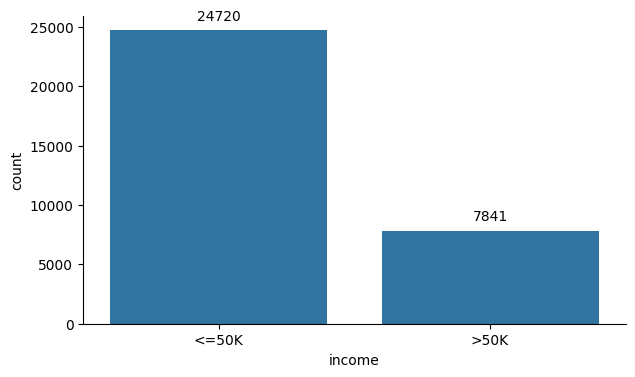

In [52]:
ax = sns.countplot(x=df["income"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

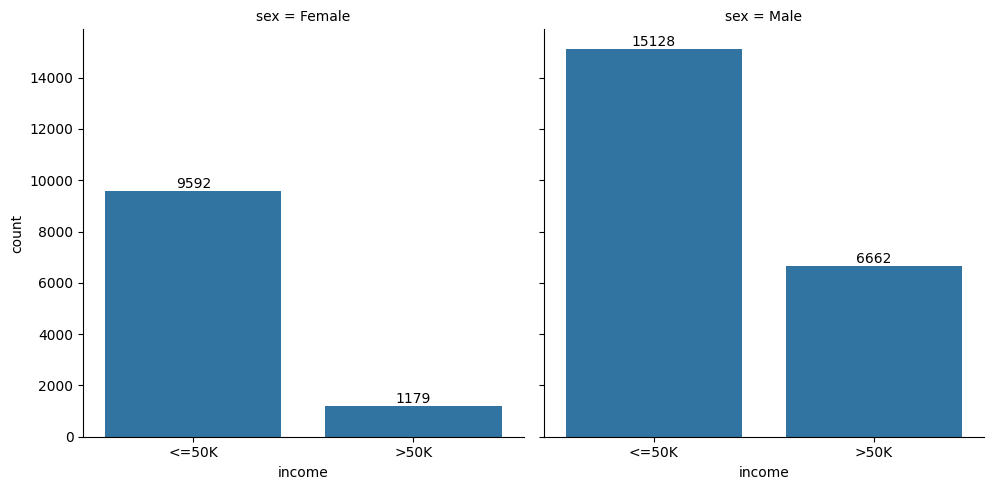

In [53]:
g = sns.catplot(x="income", data=df, kind="count", col="sex")

g.facet_axis(0,0).bar_label(container=g.facet_axis(0,0).containers[0])
g.facet_axis(0,1).bar_label(container=g.facet_axis(0,1).containers[0]);

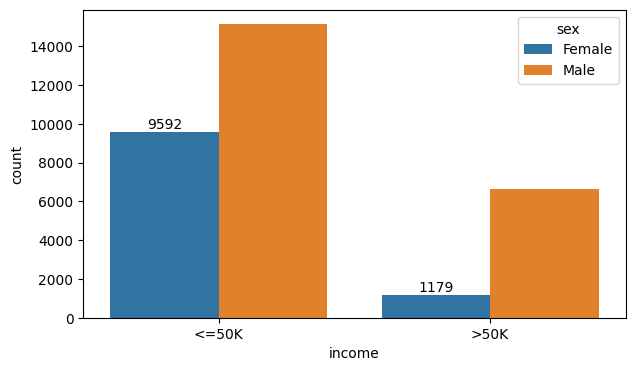

In [54]:
ax = sns.countplot(x="income", hue="sex", data = df)
ax.bar_label(ax.containers[0]);

In [55]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [56]:
# "income" sütununu 0-1'e dönüştürme
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)


In [57]:
#sns.pairplot(df, hue = "income");

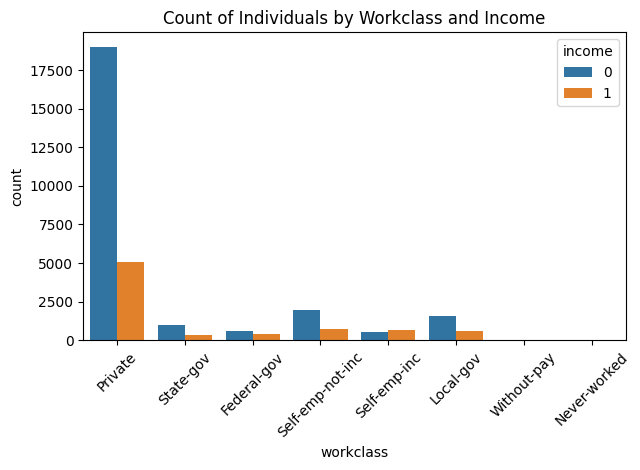

In [58]:
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Count of Individuals by Workclass and Income')
plt.xticks(rotation=45)
plt.show()

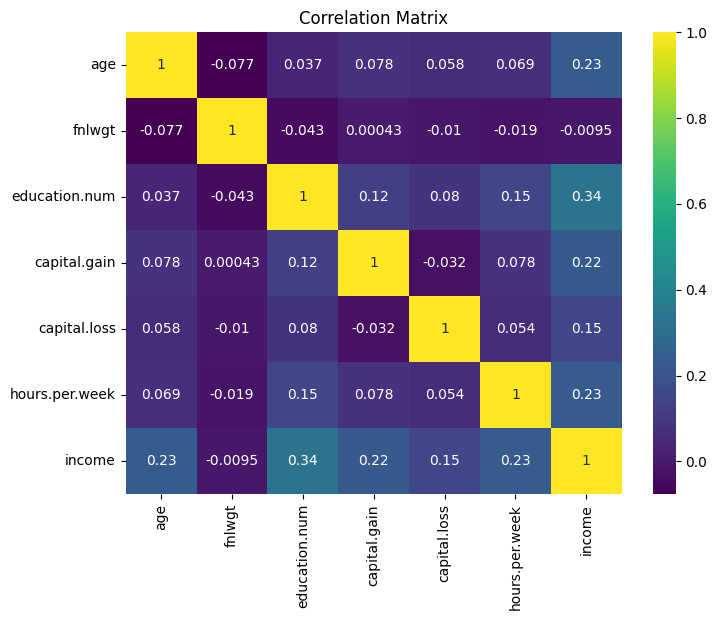

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

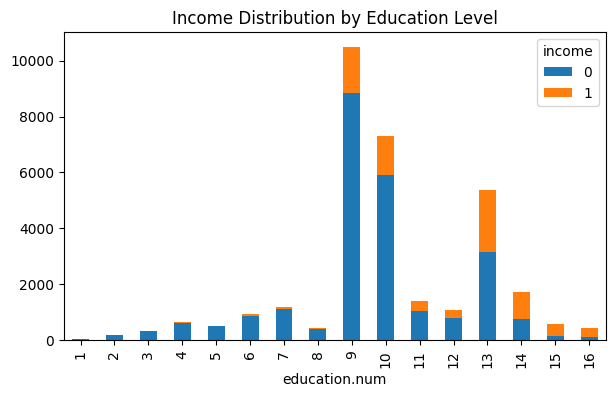

In [60]:
pd.crosstab(df['education.num'], df['income']).plot(kind='bar', stacked=True)
plt.title('Income Distribution by Education Level')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  native.country  32561 non-null  object
 12  income          32561 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 3.2+ MB


In [62]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [63]:
df.sample(1)

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
12057,41,Private,188615,10,Married-civ-spouse,Craft-repair,White,Male,0,0,40,United-States,1


In [64]:
df = df[[col for col in df.columns if col != 'income'] + ['income']]

In [65]:
df.sample(1)

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
14750,38,Private,269323,9,Married-civ-spouse,Adm-clerical,White,Male,0,0,40,United-States,1


# Modelling

## Train | Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = df.drop('income', axis=1)  
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [68]:
X_train.shape

(22792, 12)

In [69]:
X_test.shape

(9769, 12)

In [70]:
X_train.sample(1)

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country
17699,34,Private,362787,9,Never-married,Machine-op-inspct,Black,Female,0,0,40,United-States


In [71]:
X_test.sample(1)

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country
22382,23,Local-gov,212803,13,Never-married,Prof-specialty,White,Female,0,0,35,United-States


## OneHotEncoder

In [72]:
categor = X_train.select_dtypes("object").columns 
categor


Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
       'native.country'],
      dtype='object')

In [73]:
X_train[categor].sample(3)

,workclass,marital.status,occupation,race,sex,native.country
8121,Private,Never-married,Prof-specialty,White,Female,Canada
7898,State-gov,Never-married,Prof-specialty,White,Male,United-States
9875,Private,Divorced,Exec-managerial,White,Female,United-States


In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

In [75]:
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore', feature_name_combiner='concat')
column_trans = make_column_transformer((encoder, categor), remainder=StandardScaler())


In [76]:
pd.DataFrame(column_trans.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.772931,0.164369,-0.417498,-0.146857,-0.217228,0.615425
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.066512,0.017208,-2.355030,-0.146857,-0.217228,0.777316
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.360093,1.442044,-0.029991,-0.146857,-0.217228,-0.436870
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.309672,0.288045,-0.029991,-0.146857,-0.217228,-2.298622
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.401394,-1.262519,-0.029991,0.866359,-0.217228,0.372588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.768371,-1.456167,1.132528,-0.146857,-0.217228,0.372588
22788,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.185768,-0.373918,1.907541,-0.146857,-0.217228,0.777316
22789,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.993117,0.628834,1.132528,-0.146857,-0.217228,-0.032141
22790,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.506884,-0.312156,-1.192511,-0.146857,-0.217228,-0.032141


Parametrelerin her birini açıklaması:

1. **categories**: Bu parametre, kategorik sütunlardaki benzersiz kategori sayısını otomatik olarak belirlemek için kullanılır. 'auto' olarak ayarlandığında, kategorik sütunlardaki benzersiz kategoriler otomatik olarak belirlenir. Varsayılan olarak, 'auto' ayarlıdır.

2. **drop**: Bu parametre, kategorik sütunların kodlanmasından sonra orijinal sütunun kaldırılıp kaldırılmayacağını belirler. Varsayılan olarak, bu parametre `None` olarak ayarlıdır, yani orijinal sütunlar kodlanmış sütunlarla birlikte kalır.

3. **sparse**: Bu parametre artık kullanılmıyor (`deprecated`). Önceden, kodlanmış verinin seyrek formda olup olmayacağını belirlemek için kullanılıyordu. Ancak, bu parametre artık önerilmiyor.

4. **sparse_output**: Bu parametre, kodlanmış verinin seyrek matris formunda olup olmayacağını belirler. `True` olarak ayarlandığında, kodlanmış veri seyrek matris olarak döndürülür. Bu, bellek kullanımını minimize etmeye yardımcı olabilir. Varsayılan olarak `False` olarak ayarlıdır.

5. **dtype**: Bu parametre, kodlanmış sütunların veri türünü belirler. Varsayılan olarak, `numpy.float64` olarak ayarlanmıştır.

6. **handle_unknown**: Bu parametre, kodlanırken bilinmeyen kategorik değerlerle karşılaşıldığında nasıl bir işlem yapılacağını belirler. 'error' olarak ayarlandığında, hata verilir. 'ignore' olarak ayarlandığında, bilinmeyen kategorik değerler yok sayılır.

7. **min_frequency**: Bu parametre, kategorik değerlerin en az kaç kez görünmesi gerektiğini belirler. Bu, nadir kategorik değerlerin kodlanmasını sınırlandırmak için kullanılabilir.

8. **max_categories**: Bu parametre, bir sütunda en fazla kaç farklı kategori olabileceğini belirler. Bu, çok fazla kategoriye sahip sütunların kodlanmasını sınırlamak için kullanılabilir.

9. **feature_name_combiner**: Bu parametre, birden fazla kodlanmış sütunu birleştirirken kullanılacak yöntemi belirler. 'concat' olarak ayarlandığında, sütun isimleri birleştirilir.

Bu parametreler, `pd.get_dummies()` fonksiyonunu kullanırken kodlanmış verinin nasıl oluşturulacağını ve işleneceğini ayarlamak için kullanılır.

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline


operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=42))]

pipe_log = Pipeline(steps=operations)



In [78]:
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
       'native.country'],
      dtype='object'))])),
                ('log_model', LogisticRegression(random_state=42))])

In [79]:
y_pred = pipe_log.predict(X_test)
y_pred_proba = pipe_log.predict_proba(X_test)

In [80]:
my_dict = {"actual": y_test}

In [81]:
result_log = pd.DataFrame(my_dict)
result_log

,actual
2168,1
27109,0
5261,0
31851,0
27074,0
...,...
24223,0
13110,0
15045,0
27662,1


In [82]:
result_log["pred"] = y_pred
result_log

,actual,pred
2168,1,1
27109,0,0
5261,0,0
31851,0,0
27074,0,0
...,...,...
24223,0,1
13110,0,0
15045,0,0
27662,1,1


In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
eval_metric(pipe_log, X_train, y_train, X_test, y_test)


Test_Set
[[6903  514]
 [ 968 1384]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7417
           1       0.73      0.59      0.65      2352

    accuracy                           0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769


Train_Set
[[16135  1168]
 [ 2188  3301]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     17303
           1       0.74      0.60      0.66      5489

    accuracy                           0.85     22792
   macro avg       0.81      0.77      0.78     22792
weighted avg       0.85      0.85      0.85     22792



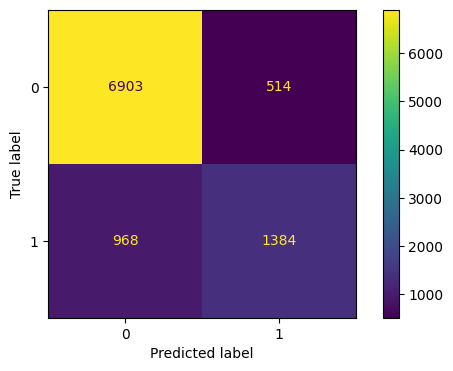

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(pipe_log, X_test, y_test)
plt.show()

# Cross Validate 

In [86]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

operations = [("column_trans", column_trans), ("log_model", LogisticRegression(random_state=42))]

model = Pipeline(steps=operations)


scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.196358,0.010410,0.857456,0.852477,0.742424,0.738653,0.624772,0.599595,0.678536,0.661899
2,0.151363,0.009578,0.859649,0.851697,0.755011,0.738203,0.617486,0.595344,0.679359,0.659121
3,0.166912,0.016536,0.847301,0.852825,0.729358,0.738698,0.580292,0.601902,0.646341,0.663321
4,0.150107,0.016507,0.844669,0.853849,0.721088,0.739872,0.579235,0.606275,0.642424,0.666444
5,0.216588,0.016849,0.852128,0.852728,0.740909,0.738385,0.593807,0.601619,0.659252,0.663023
6,0.150247,0.016422,0.854322,0.852338,0.742729,0.738458,0.604736,0.598988,0.666667,0.661451
7,0.166613,0.016568,0.861781,0.851606,0.772093,0.736291,0.604736,0.597976,0.678243,0.659964
8,0.180572,0.000575,0.859149,0.852338,0.750000,0.738458,0.622951,0.598988,0.680597,0.661451
9,0.163759,0.000498,0.842036,0.854190,0.706783,0.741034,0.588342,0.606478,0.642147,0.667038
10,0.203120,0.000000,0.843352,0.854288,0.712389,0.742360,0.586521,0.604858,0.643357,0.666592


In [87]:
df_scores.mean()[2:]  

test_accuracy      0.852184
train_accuracy     0.852833
test_precision     0.737279
train_precision    0.739041
test_recall        0.600288
train_recall       0.601202
test_f1            0.661692
train_f1           0.663030
dtype: float64

In [88]:
# pipeline for logistic regression


operations = [("column_trans", column_trans), ("log_model", LogisticRegression(max_iter=5000, random_state=42))]

model = Pipeline(steps=operations)

# l1: Lasso, l2: Ridge
penalty = ["l2", "l1"]

# -1 ile 5 arasında 20 tane C değeri elde etmek için
# C arttıkça regülarizasyon düşer, alphanın tersi olarak
# C için np.logspace kullanmanın nedeni, regülarizasyonun optimal değerinin genellikle belirli bir aralıkta olmamasıdır.
# Bu nedenle, geniş bir aralıkta farklı değerleri denemek ve en iyi sonucu veren değeri bulmak için logaritmik bir ölçekte
# değerler oluşturmak mantıklıdır.
C = np.logspace(-1, 5, 10)

# balanced: sınıf ağırlıkları dengeli, None: sınıf ağırlığı yok
class_weight = ["balanced", None]
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# solver ın dört değeri
solver = ["lbfgs", "liblinear", "sag", "saga"]

# penalty, C, class_weight ve solver'ın tüm kombinasyonlarını elde etmek için
param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": C,  # hata alan alanlar "log_model__C" : C, yapsınlar
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}

scorer = make_scorer(accuracy_score, average='macro')

# en iyi modeli elde etmek için
log_grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring=scorer,   # Default olarak 1 sınıfının scorunu max. eder
    return_train_score=True,    
    n_jobs=-1)  # bütün işlemciler burda çalışsın diye

# GridsearchCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [89]:
log_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
       'native.country'],
      dtype='object'))])),
                                       ('log_model',
                                        LogisticRegression(max_iter=5...
             param_grid={'log_model__C': array([1.00000000e-01, 4.64158883e-01, 2.15443469e+00, 1.00000000e+01,
       4.64158883e+01, 2.15443469e+02, 1.00000000e+03, 4.64158883e+03,
       2.15443469e+04, 1.00000000e+05]),
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l2', 'l1'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             return_train_score=True,
             scoring=make_scorer(accuracy_score, response_method='predict', average=macro))

In [90]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)  

Test_Set
[[5906 1511]
 [ 402 1950]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      7417
           1       0.56      0.83      0.67      2352

    accuracy                           0.80      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.85      0.80      0.81      9769


Train_Set
[[13853  3450]
 [  867  4622]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.87     17303
           1       0.57      0.84      0.68      5489

    accuracy                           0.81     22792
   macro avg       0.76      0.82      0.77     22792
weighted avg       0.85      0.81      0.82     22792



# K-Nearest Neighbors (KNN) Classification

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, categor), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)

In [93]:
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
       'native.country'],
      dtype='object'))])),
                ('knn_model', KNeighborsClassifier())])

In [94]:
y_pred = pipe_knn.predict(X_test)
y_pred_proba = pipe_knn.predict_proba(X_test)

In [95]:
my_dict = {"actual": y_test}
result_knn = pd.DataFrame(my_dict)
result_knn
result_knn["pred"] = y_pred
result_knn["pred_proba"] = y_pred_proba[:,1]
result_knn

,actual,pred,pred_proba
2168,1,1,1.0
27109,0,0,0.0
5261,0,0,0.0
31851,0,0,0.0
27074,0,0,0.0
...,...,...,...
24223,0,1,1.0
13110,0,0,0.0
15045,0,0,0.0
27662,1,1,0.8


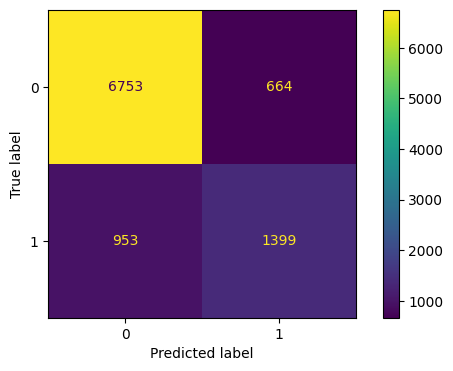

In [96]:
ConfusionMatrixDisplay.from_estimator(pipe_knn, X_test, y_test);


In [97]:
eval_metric(pipe_knn, X_train, y_train, X_test, y_test)

Test_Set
[[6753  664]
 [ 953 1399]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      7417
           1       0.68      0.59      0.63      2352

    accuracy                           0.83      9769
   macro avg       0.78      0.75      0.76      9769
weighted avg       0.83      0.83      0.83      9769


Train_Set
[[16246  1057]
 [ 1618  3871]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     17303
           1       0.79      0.71      0.74      5489

    accuracy                           0.88     22792
   macro avg       0.85      0.82      0.83     22792
weighted avg       0.88      0.88      0.88     22792



### CV and GridSearch - KNN

In [98]:
operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.067501,0.151332,0.836404,0.880216,0.670543,0.781200,0.630237,0.698178,0.649765,0.737360
2,0.078140,0.124939,0.845614,0.880460,0.704782,0.779928,0.617486,0.701619,0.658252,0.738704
3,0.046864,0.156213,0.838526,0.881929,0.691489,0.781830,0.593066,0.707144,0.638507,0.742614
4,0.046863,0.156212,0.824484,0.882709,0.656184,0.787562,0.570128,0.702429,0.610136,0.742564
5,0.062453,0.140589,0.834138,0.883342,0.677755,0.787277,0.593807,0.706478,0.633010,0.744692
6,0.062483,0.156212,0.840281,0.880807,0.686869,0.781285,0.619308,0.701417,0.651341,0.739200
7,0.062530,0.156201,0.837209,0.883294,0.684647,0.788401,0.601093,0.704453,0.640155,0.744067
8,0.062451,0.155367,0.833260,0.882806,0.666012,0.787008,0.617486,0.703846,0.640832,0.743108
9,0.050191,0.150930,0.817903,0.884854,0.631373,0.788884,0.586521,0.712551,0.608121,0.748777
10,0.060824,0.104716,0.829750,0.882562,0.660679,0.784190,0.602914,0.706883,0.630476,0.743532


In [99]:
df_scores.mean()[2:]  

test_accuracy      0.833757
train_accuracy     0.882298
test_precision     0.673033
train_precision    0.784757
test_recall        0.603205
train_recall       0.704500
test_f1            0.636060
train_f1           0.742462
dtype: float64

In [100]:
pipe_knn.get_params()

{'memory': None,
 'steps': [('column_trans',
   ColumnTransformer(remainder=StandardScaler(),
                     transformers=[('onehotencoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
          'native.country'],
         dtype='object'))])),
  ('knn_model', KNeighborsClassifier())],
 'verbose': False,
 'column_trans': ColumnTransformer(remainder=StandardScaler(),
                   transformers=[('onehotencoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse_output=False),
                                  Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',

In [101]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, categor), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("knn_model", KNeighborsClassifier())]

pipe_knn = Pipeline(steps=operations)

# Define the parameter grid for hyperparameter tuning
param_grid = {"knn_model__n_neighbors": range(1, 30), "knn_model__p":[1,2], "knn_model__weights":["uniform", "distance"]}

scorer = make_scorer(accuracy_score, average='macro')

# Grid search with cross-validation
knn_pipe_grid = GridSearchCV(pipe_knn, param_grid, cv=5, scoring=scorer)

# Fit the grid search object to the data



In [102]:
knn_pipe_grid.fit(X_train, y_train)  # assuming you have X_train and y_train


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
       'native.country'],
      dtype='object'))])),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid={'knn_model__n_neighbors': range(1, 30),
                         'knn_model__p': [1, 2],
                         'knn_model__weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score, response_method='predict', average=macro))

In [103]:
eval_metric(knn_pipe_grid, X_train, y_train, X_test, y_test)

Test_Set
[[6467  950]
 [ 995 1357]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      7417
           1       0.59      0.58      0.58      2352

    accuracy                           0.80      9769
   macro avg       0.73      0.72      0.73      9769
weighted avg       0.80      0.80      0.80      9769


Train_Set
[[17303     0]
 [    0  5489]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17303
           1       1.00      1.00      1.00      5489

    accuracy                           1.00     22792
   macro avg       1.00      1.00      1.00     22792
weighted avg       1.00      1.00      1.00     22792



In [105]:
knn_pipe_grid.best_params_

{'knn_model__n_neighbors': 1,
 'knn_model__p': 1,
 'knn_model__weights': 'uniform'}

In [106]:
knn_pipe_grid.best_score_

nan

# Support Vector Classifier

In [107]:
from sklearn.svm import SVC

In [108]:
hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, categor), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("svm_model", SVC())]

pipe_svm = Pipeline(steps=operations)

In [109]:
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
       'native.country'],
      dtype='object'))])),
                ('svm_model', SVC())])

In [110]:
y_predict = pipe_svm.predict(X_test)
y_predict

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## SVM Model Performance

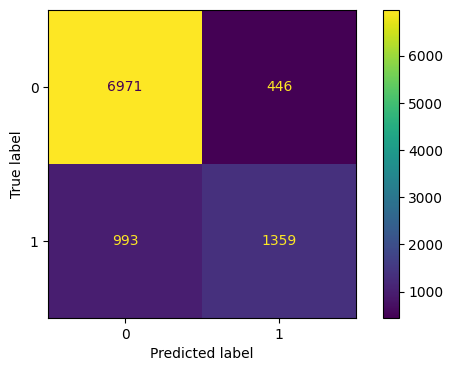

In [111]:
ConfusionMatrixDisplay.from_estimator(pipe_svm, X_test, y_test);

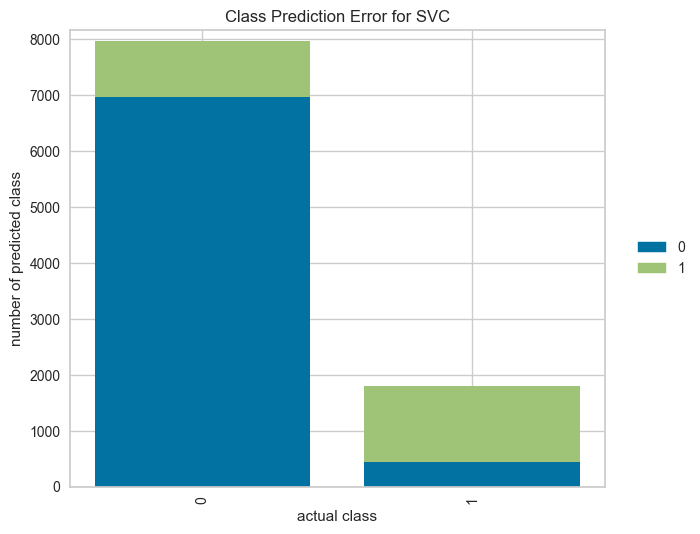

In [112]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(pipe_svm)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

In [113]:
eval_metric(pipe_svm, X_train, y_train, X_test, y_test)


Test_Set
[[6971  446]
 [ 993 1359]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7417
           1       0.75      0.58      0.65      2352

    accuracy                           0.85      9769
   macro avg       0.81      0.76      0.78      9769
weighted avg       0.85      0.85      0.85      9769


Train_Set
[[16414   889]
 [ 2163  3326]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     17303
           1       0.79      0.61      0.69      5489

    accuracy                           0.87     22792
   macro avg       0.84      0.78      0.80     22792
weighted avg       0.86      0.87      0.86     22792



## CV And GridSearch - SVM

In [114]:
operations = [("column_trans", column_trans), ("svm_model", SVC())]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], 
                        cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,10.180691,4.336531,0.862909,0.864586,0.774681,0.784994,0.607468,0.602824,0.680960,0.681953
2,11.263145,4.581247,0.853696,0.867274,0.761847,0.790794,0.571038,0.610339,0.652785,0.688946
3,11.231351,5.094329,0.858052,0.866787,0.777094,0.791506,0.575205,0.606785,0.661079,0.686944
4,11.277332,4.915213,0.863975,0.864648,0.790049,0.792694,0.592896,0.593031,0.677419,0.678478
5,10.781262,5.224573,0.849934,0.867720,0.742958,0.797773,0.576503,0.603735,0.649231,0.687322


In [115]:
df_scores.mean()[2:]  

test_accuracy      0.857713
train_accuracy     0.866203
test_precision     0.769325
train_precision    0.791552
test_recall        0.584622
train_recall       0.603343
test_f1            0.664295
train_f1           0.684729
dtype: float64

In [ ]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, cat), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("svm_model",SVC())]

pipe_svm = Pipeline(steps=operations)

# Define the parameter grid for hyperparameter tuning
param_grid = {'svm_model__C': [0.1, 1.0, 10], 'svm_model__gamma': ["auto", "scale"], 'svm_model__kernel': ["rbf", "linear"] }

#'svm_model__C': [0.1, 1, 5] first given values

scorer = make_scorer(f1_score, average='macro')

# Grid search with cross-validation
svm_pipe_grid = GridSearchCV(pipe_svm, param_grid, cv=5, scoring=scorer, n_jobs=-1)

# Fit the grid search object to the data


In [ ]:
svm_pipe_grid.fit(X_train, y_train)

In [ ]:
y_pred = svm_pipe_grid.predict(X_test)
y_pred

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(svm_pipe_grid, X_train, y_train, X_test, y_test)


## Final Model

In [116]:
df.sample(3)

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
23076,57,Local-gov,190748,10,Divorced,Exec-managerial,White,Female,0,0,35,United-States,0
26079,31,State-gov,63704,13,Never-married,Prof-specialty,White,Female,0,0,40,United-States,0
2667,49,State-gov,185800,14,Divorced,Prof-specialty,Black,Female,7430,0,40,United-States,1


In [117]:
X = df.drop(columns=["income"])
y = df['income']

In [118]:
from sklearn.linear_model import LogisticRegression

In [122]:

hot_enc = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore', feature_name_combiner='concat')

column_trans = make_column_transformer((hot_enc, categor), remainder=StandardScaler())

operations = [("column_trans", column_trans), ("log_model", LogisticRegression(penalty='l2',
                                                                                C=1.0,
                                                                                solver='liblinear',
                                                                                max_iter=5000,
                                                                                n_jobs=-1,
                                                                                random_state=101))]

pipe_final = Pipeline(steps=operations)



In [123]:
pipe_final.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['workclass', 'marital.status', 'occupation', 'race', 'sex',
       'native.country'],
      dtype='object'))])),
                ('log_model',
                 LogisticRegression(max_iter=5000, n_jobs=-1, random_state=101,
                                    solver='liblinear'))])

In [124]:
sample =X.head(5)
pipe_final.predict(sample)


array([1, 1, 1, 0, 0], dtype=int64)

In [126]:
prediction = pipe_final.predict(sample)
comparing = df.head()
comparing["prediction"] = prediction


In [127]:
comparing

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,prediction
0,90,Private,77053,9,Widowed,Exec-managerial,White,Female,0,4356,40,United-States,0,1
1,82,Private,132870,9,Widowed,Exec-managerial,White,Female,0,4356,18,United-States,0,1
2,66,Private,186061,10,Widowed,Exec-managerial,Black,Female,0,4356,40,United-States,0,1
3,54,Private,140359,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,United-States,0,0
4,41,Private,264663,10,Separated,Prof-specialty,White,Female,0,3900,40,United-States,0,0
